In [55]:
# import necessary library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
%matplotlib inline

In [56]:
#Read the data
df_2019 = pd.read_csv("./world_happiness/2019.csv")
df_2018 = pd.read_csv("./world_happiness/2018.csv")
df_2017 = pd.read_csv("./world_happiness/2017.csv")
df_2016 = pd.read_csv("./world_happiness/2016.csv")
df_2015 = pd.read_csv("./world_happiness/2015.csv")

In [57]:
# Check how 2019 data looks like
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [58]:
# Add year attribute to data
df_2019['year'] = 2019
df_2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2019
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,2019
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,2019
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,2019
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2019


In [59]:
# Check how 2018 data looks like
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       155 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [60]:
# Add year attribute to data
df_2018['year'] = 2018

In [61]:
df_2018.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295,2018
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291,2018
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389,2018
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383,2018
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302,2018


In [62]:
# Check how 2017 data looks like
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [63]:
# Now we have found that we had to rename certain countries by checking World Happiness Report Website
# Since we will use 2019 as test set, we will use the columns that exist in 2019
# Add a year column
df_2017['year'] = 2017
df_2017.rename(columns={"Country": "Country or region", 
 "Happiness.Rank": "Overall rank",
  'Happiness.Score': 'Score',
 'Health..Life.Expectancy.' : 'Healthy life expectancy', 
  'Freedom':'Freedom to make life choices',
 'Trust..Government.Corruption.' :'Perceptions of corruption',
   'Economy..GDP.per.Capita.' : 'GDP per capita',    
     'Family':'Social support'                   
 },inplace = True)
df_2017.columns

Index(['Country or region', 'Overall rank', 'Score', 'Whisker.high',
       'Whisker.low', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia.Residual', 'year'],
      dtype='object')

In [64]:
df_2017.head(10)

,Country or region,Overall rank,Score,Whisker.high,Whisker.low,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,2017
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,2017
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,2017
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,2017
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,2017


In [65]:
# Check how 2016 data looks like
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


In [66]:
# Add a year column
df_2016['year'] = 2016
df_2016.rename(columns={
    "Country": "Country or region", 
 "Happiness Rank": "Overall rank",
  'Happiness Score': 'Score',
 'Health (Life Expectancy)' : 'Healthy life expectancy', 
  'Freedom':'Freedom to make life choices',
 'Trust (Government Corruption)' :'Perceptions of corruption',
  'Economy (GDP per Capita)' : 'GDP per capita',
    'Family':'Social support'
 },inplace = True)
df_2016.columns

Index(['Country or region', 'Region', 'Overall rank', 'Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')

In [67]:
df_2016.head(5)

,Country or region,Region,Overall rank,Score,Lower Confidence Interval,Upper Confidence Interval,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [68]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [69]:
# Add a year column
df_2015['year'] = 2015
# Rename columns
df_2015.rename(columns={
    "Country": "Country or region", 
 "Happiness Rank": "Overall rank",
  'Happiness Score': 'Score',
 'Health (Life Expectancy)' : 'Healthy life expectancy', 
  'Freedom':'Freedom to make life choices',
 'Trust (Government Corruption)' :'Perceptions of corruption',
  'Economy (GDP per Capita)' : 'GDP per capita',
 'Trust (Government Corruption)' :'Perceptions of corruption',
    'Family':'Social support'
 },inplace = True)
df_2015.columns

Index(['Country or region', 'Region', 'Overall rank', 'Score',
       'Standard Error', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')

In [70]:
df_2015.head(5)

,Country or region,Region,Overall rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [71]:
dfs = [df_2015, df_2016, df_2017, df_2018]
df = pd.concat(dfs)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# Q1
Merge

In [72]:
# Select attributes and target variable from our merged data of 2015 to 2018
train = pd.DataFrame(df,columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
        'Healthy life expectancy', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','year'])
# Selected data:
train.sample(8)

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
17,18,Belgium,6.929,1.425390,0.819590,1.052490,0.513540,0.242400,0.262480,2016
154,155,Benin,3.340,0.286650,0.319100,0.353860,0.484500,0.182600,0.080100,2015
96,97,Bhutan,5.011,0.885416,0.495879,1.340127,0.501538,0.474055,0.173380,2017
142,143,South Sudan,3.832,0.393940,0.157810,0.185190,0.196620,0.258990,0.130150,2016
66,67,Libya,5.615,1.066880,0.523040,0.950760,0.406720,0.170870,0.103390,2016
117,118,Gabon,4.465,1.198210,0.356579,1.155620,0.312329,0.043785,0.076047,2017
43,44,Venezuela,6.084,1.133670,0.619040,1.033020,0.198470,0.042500,0.083040,2016
140,141,Afghanistan,3.794,0.401477,0.180747,0.581543,0.106180,0.311871,0.061158,2017


In [73]:
# Select attributes and target variable from our merged data in 2019
test =  pd.DataFrame(df_2019,columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
        'Healthy life expectancy', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','year'])

# Q2

We will take different countries to see the trend

In [74]:
# Select some example countries or regions prepared for later analysis
d1 = train[train['Country or region']=='Denmark']
d2 = train[train['Country or region']=='Finland']
d3 = train[train['Country or region']=='United States']
d4 = train[train['Country or region']=='China']
d5 = train[train['Country or region']=='Australia']
d6 = train[train['Country or region']=='Canada']
d7 = train[train['Country or region']=='New Zealand']
d8 = train[train['Country or region']=='United Kingdom']
d9 = train[train['Country or region']=='Norway']

Text(0, 0.5, 'country or region')

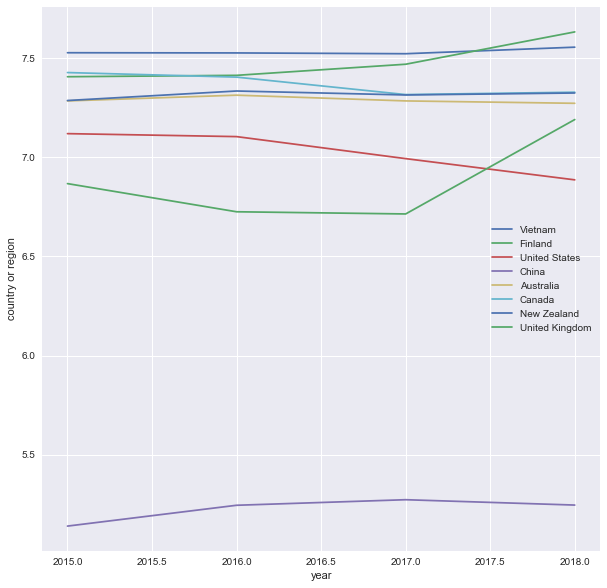

In [75]:
# Plot the trend of our selected examples's Scores 
plt.figure(figsize=(10, 10))
plt.style.use('seaborn')
plt.plot(d1['year'],d1['Score'], label="Vietnam")
plt.plot(d2['year'],d2['Score'], label="Finland")
plt.plot(d3['year'],d3['Score'], label="United States")
plt.plot(d4['year'],d4['Score'], label="China")
plt.plot(d5['year'],d5['Score'], label="Australia")
plt.plot(d6['year'],d6['Score'], label="Canada")
plt.plot(d7['year'],d7['Score'], label="New Zealand")
plt.plot(d8['year'],d8['Score'], label="United Kingdom")
plt.legend(loc=0)
plt.xlabel('year')
plt.ylabel('country or region')

In [76]:
# Calculate the mean(of all countries or regions) in each year
mean_score = train.groupby("year").mean()["Score"]
mean_score 

year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
Name: Score, dtype: float64

([<matplotlib.axis.XTick at 0x1a1b07f350>,
 <a list of 4 Text xticklabel objects>)

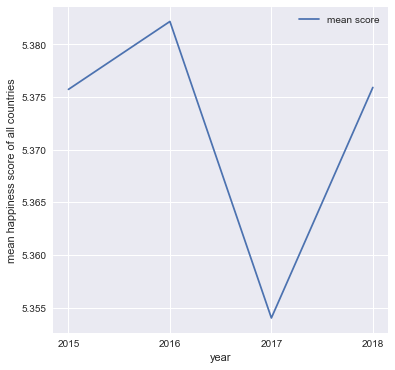

In [77]:
# Plot the mean of Score of all countries or regions from 2015 to 2018
plt.figure(figsize=(6, 6))
plt.xlabel("year")
plt.ylabel("mean happiness score of all countries")
plt.style.use('seaborn')
plt.plot(mean_score, label="mean score")
plt.legend(loc = 0)
plt.xticks([2015, 2016, 2017, 2018])

In [78]:
d3
# The happiness score seems to decrease for United States

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
14,15,United States,7.119,1.394510,0.861790,1.247110,0.546040,0.401050,0.158900,2015
12,13,United States,7.104,1.507960,0.779000,1.047820,0.481630,0.410770,0.148680,2016
13,14,United States,6.993,1.546259,0.774287,1.419921,0.505741,0.392579,0.135639,2017
17,18,United States,6.886,1.398000,0.819000,1.471000,0.547000,0.291000,0.133000,2018


In [79]:
d6
# The happiness score decreased from 2015 to 2017 and then increased in 2018 for Canada

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
4,5,Canada,7.427,1.326290,0.905630,1.322610,0.632970,0.45811,0.329570,2015
5,6,Canada,7.404,1.440150,0.827600,1.096100,0.573700,0.44834,0.313290,2016
6,7,Canada,7.316,1.479204,0.834558,1.481349,0.611101,0.43554,0.287372,2017
6,7,Canada,7.328,1.330000,0.896000,1.532000,0.653000,0.32100,0.291000,2018


In [80]:
d8
# The happiness score decreased from 2015 to 2018 and then incresed in 2018 for United Kingdom

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
20,21,United Kingdom,6.867,1.266370,0.909430,1.28548,0.59625,0.519120,0.320670,2015
22,23,United Kingdom,6.725,1.402830,0.809910,1.08672,0.50036,0.501560,0.273990,2016
18,19,United Kingdom,6.714,1.441634,0.805336,1.49646,0.50819,0.492774,0.265428,2017
10,11,United Kingdom,7.190,1.244000,0.888000,1.43300,0.46400,0.262000,0.082000,2018


# Q3

Stable rankings (They had the least standard deviation in Overall Rankings)

In [81]:
train.groupby('Country or region').std().nsmallest(10, 'Overall rank')
# These countries have rather stable rannkings

,Overall rank,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
Country or region,,,,,,,,,
Suriname,0.000000,0.000000,0.071785,0.069912,0.136712,0.052489,0.002305,0.006654,0.707107
Australia,0.500000,0.017443,0.075521,0.043293,0.211970,0.039472,0.054186,0.025883,1.290994
New Zealand,0.500000,0.020680,0.074325,0.042004,0.200009,0.037209,0.063242,0.022597,1.290994
Austria,0.577350,0.081023,0.076340,0.046484,0.190345,0.038927,0.042145,0.016966,1.290994
Netherlands,0.577350,0.042264,0.082897,0.043109,0.204586,0.037329,0.070330,0.014710,1.290994
Iceland,0.816497,0.030729,0.080501,0.050398,0.213269,0.045371,0.058064,0.007188,1.290994
Sweden,0.816497,0.036179,0.077483,0.046712,0.192601,0.037851,0.047031,0.026029,1.290994
Costa Rica,0.957427,0.073589,0.067377,0.048461,0.199314,0.040157,0.047514,0.002969,1.290994
Canada,0.957427,0.055011,0.077611,0.040553,0.196074,0.033955,0.063837,0.019822,1.290994


In [82]:
train.groupby('Country or region').mean().nsmallest(10, 'Overall rank')
# These countries are ranked very high on average from 2015 tto 2018

,Overall rank,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
Country or region,,,,,,,,,
Denmark,2.25,7.53250,1.400161,0.832561,1.416360,0.634449,0.335595,0.434218,2016.5
Norway,2.75,7.53775,1.527226,0.834667,1.393343,0.646811,0.343488,0.344688,2016.5
Iceland,3.00,7.51525,1.388153,0.890681,1.460016,0.624793,0.435405,0.145682,2016.5
Switzerland,3.00,7.51925,1.477205,0.897398,1.390165,0.632803,0.281040,0.388954,2016.5
Finland,4.25,7.48000,1.361200,0.845794,1.396287,0.627920,0.233978,0.399843,2016.5
Canada,6.25,7.36875,1.393911,0.865947,1.358015,0.617693,0.415747,0.305308,2016.5
Netherlands,6.50,7.38375,1.414766,0.848462,1.306557,0.597814,0.438437,0.298768,2016.5
New Zealand,8.25,7.31450,1.321137,0.858022,1.410411,0.625978,0.458506,0.405019,2016.5
Sweden,9.00,7.31325,1.408227,0.871489,1.338968,0.628476,0.353890,0.403627,2016.5


Improved countries

In [83]:
d2
# Finland increased its rank from 6th in 2015 to 1st in 2018

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
5,6,Finland,7.406,1.290250,0.889110,1.318260,0.641690,0.233510,0.413720,2015
4,5,Finland,7.413,1.405980,0.810910,1.134640,0.571040,0.254920,0.410040,2016
4,5,Finland,7.469,1.443572,0.809158,1.540247,0.617951,0.245483,0.382612,2017
0,1,Finland,7.632,1.305000,0.874000,1.592000,0.681000,0.202000,0.393000,2018


In [84]:
d9
# Norway increased its rank from 4th in 2015 to 2nd in 2018

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
3,4,Norway,7.522,1.459000,0.885210,1.330950,0.669730,0.346990,0.365030,2015
3,4,Norway,7.498,1.577440,0.795790,1.126900,0.596090,0.378950,0.357760,2016
0,1,Norway,7.537,1.616463,0.796667,1.533524,0.635423,0.362012,0.315964,2017
1,2,Norway,7.594,1.456000,0.861000,1.582000,0.686000,0.286000,0.340000,2018


In [85]:
d8
# UK increased its rank from 21st in 2015 to 11st in 2018

,Overall rank,Country or region,Score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
20,21,United Kingdom,6.867,1.266370,0.909430,1.28548,0.59625,0.519120,0.320670,2015
22,23,United Kingdom,6.725,1.402830,0.809910,1.08672,0.50036,0.501560,0.273990,2016
18,19,United Kingdom,6.714,1.441634,0.805336,1.49646,0.50819,0.492774,0.265428,2017
10,11,United Kingdom,7.190,1.244000,0.888000,1.43300,0.46400,0.262000,0.082000,2018


# Q4

(9.0, 0.0)

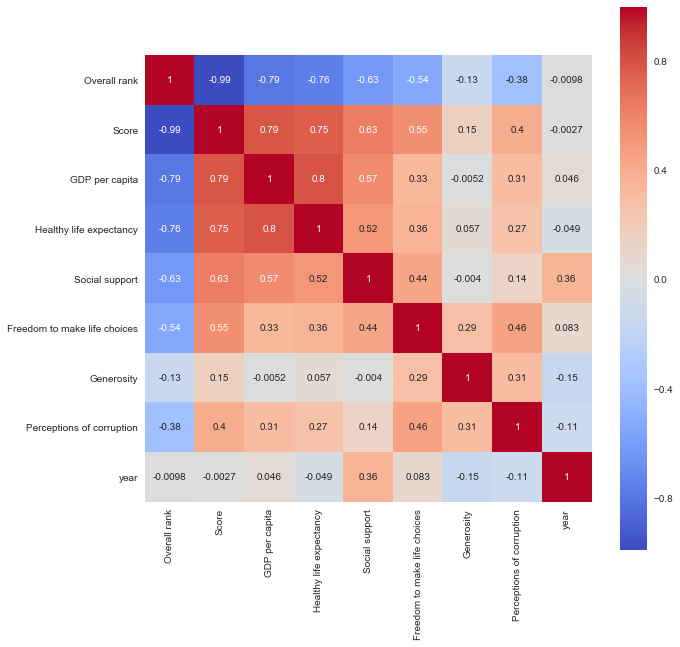

In [86]:
# make a heatmap tp show the correlation between happiness score and other numerical variables such as GDP per capita, life expectancy
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(),cmap = 'coolwarm',annot = True, square = True) # plot the heatmap
bot, top = plt.ylim() 
bot+=0.5
top-=0.5
plt.ylim(bot, top) 

From the heatmap above we can see that the happniess score has a strong correlation with GDP per capita, life expectancy, social support, and freedom

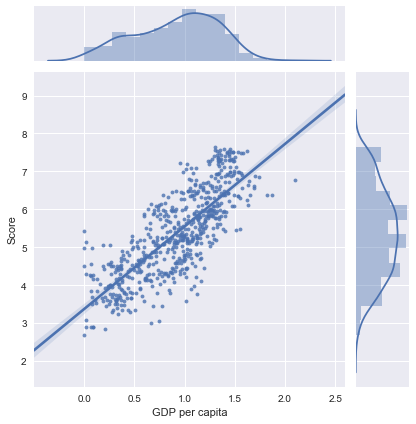

In [87]:
# visulize the relation between GDP per capita and happiness score, we can see there is a strong correlattion
sns.jointplot(x="GDP per capita", y="Score", data=train, kind="reg", scatter_kws={'s':15})

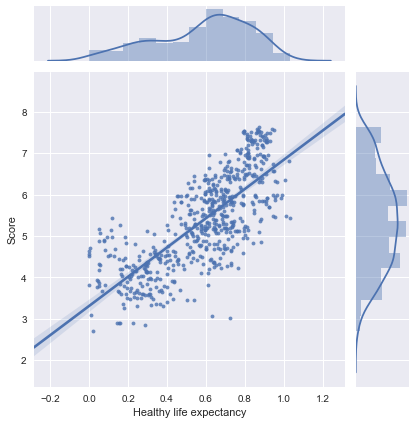

In [88]:
# visulize the relation between life expectancy and happiness score, we can see there is a strong correlattion
sns.jointplot(x="Healthy life expectancy", y="Score", data=train, kind="reg", scatter_kws={'s':15})

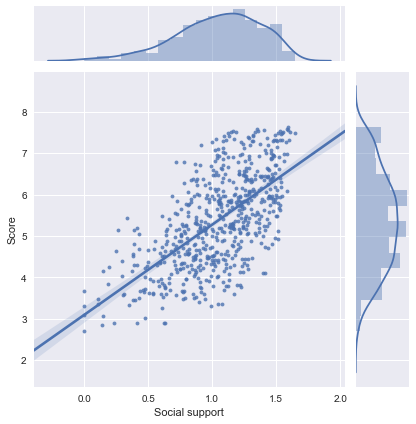

In [89]:
# visulize the relation between social support and happiness score, we can see there is a strong correlattion
sns.jointplot(x="Social support", y="Score", data=train, kind="reg", scatter_kws={'s':15})

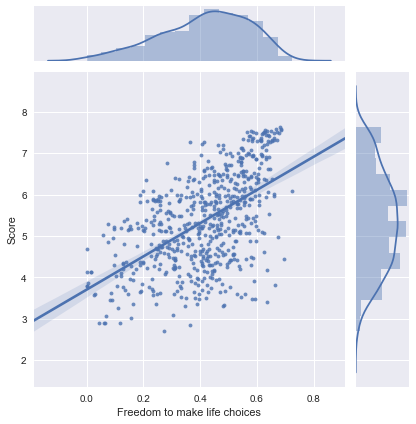

In [90]:
# visulize the relation between freedom and happiness score, we can see there is a strong correlattion
sns.jointplot(x="Freedom to make life choices", y="Score", data=train, kind="reg", scatter_kws={'s':15})

## Q5
From the visualization we can see that GDP per capita, life expectancy, social support, and freedom play an importanct role in countries' happiness scores. As a result, If I were a president, I would develop the economy (GDP per capita), build a strong health care system & encourage people to do exercise frequently (Life expectancy), encourage people to support the needed people (social support), and create a free environment where people can make life dicision freely in order to make my citizens happier.

# Modeling and Analysis

In [91]:
X_train = train[["GDP per capita", "Healthy life expectancy", 'Social support', 'Freedom to make life choices']]
X_train 

,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices
0,1.39651,0.94143,1.34951,0.66557
1,1.30232,0.94784,1.40223,0.62877
2,1.32548,0.87464,1.36058,0.64938
3,1.45900,0.88521,1.33095,0.66973
4,1.32629,0.90563,1.32261,0.63297
...,...,...,...,...
151,0.44200,0.34300,1.07300,0.24400
152,0.45500,0.38100,0.99100,0.48100
153,0.33700,0.17700,0.60800,0.11200
154,0.02400,0.01000,0.00000,0.30500


In [92]:
y_train = train["Score"]
y_train

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
151    3.355
152    3.303
153    3.254
154    3.083
155    2.905
Name: Score, Length: 626, dtype: float64

In [93]:
X_test = df_2019[["GDP per capita", "Healthy life expectancy", 'Social support', 'Freedom to make life choices']]
X_test

,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices
0,1.340,0.986,1.587,0.596
1,1.383,0.996,1.573,0.592
2,1.488,1.028,1.582,0.603
3,1.380,1.026,1.624,0.591
4,1.396,0.999,1.522,0.557
...,...,...,...,...
151,0.359,0.614,0.711,0.555
152,0.476,0.499,0.885,0.417
153,0.350,0.361,0.517,0.000
154,0.026,0.105,0.000,0.225


In [94]:
y_test = df_2019["Score"]
y_test

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

In [95]:
score_original = df_2019["Score"] #Original Score
rank_original = df_2019["Overall rank"] #Original Rank

# Model 1: Multiple Linear Regression
Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. It uses Least Squares Estimation to estimate the coefficient of each variable. The least squares provides a way of choosing the coefficients effectively by minimizing the sum of the squared errors.

In [96]:
# Build the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
regression = lm.fit(X_train, y_train)
score_predict1 = lm.predict(X_test) # predictted score for 2019
regression.score(X_test, y_test)

0.7426353989015174

(2.603303824567446, 8.018696175432556)

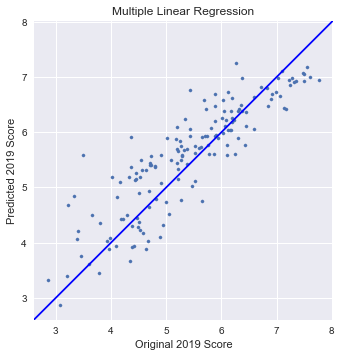

In [97]:
fig, ax = plt.subplots()
plt.scatter(y_test, score_predict1.flatten(),s = 10)
plt.xlabel('Original 2019 Score')
plt.ylabel('Predicted 2019 Score')
plt.title('Multiple Linear Regression')
# Adding a blue line which indicates: Original 2019 Score = Predicted 2019 Score
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'b-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [98]:
from sklearn.metrics import mean_squared_error
# Here we compute the root mean squared error to evaluate the multiple linear regression model.
RMSE = np.sqrt(mean_squared_error(score_original, score_predict1)) 
mean = np.mean(score_original)
print(RMSE)
print(mean)
# Evaluating the performance by score
# The RMSE of our predicted score is quite small, so we can say that the multiple linear regression model did well.

0.5628852790041101
5.407096153846153


In [99]:
rank_predict1 = pd.Series(score_predict1).rank(ascending = 0) # predicted rank for 2019
RMSE = np.sqrt(mean_squared_error(df_2019["Overall rank"], rank_predict1)) 
print(RMSE)
# Evaluating the performance by rank
# The RMSE of our predicted rank is small, so we can say that the multiple linear regression model did well.

20.692808115195668


# Model 2: Epsilon-Support Vector Regression.
The second model is called support-vector machines. This algorithm deals with both classfication and regression problems. Here we used the regression version of SVM:SVR. SVR allows us to decide how much error is acceptable in our model and finds hyperplanes to fit the data. The algorithm sets up contraints to minimize error: making it less than or equal to a margin or maximum error ϵ (epsilon). In this way, it sets up the hyperplane that maximizes the margin.

In [100]:
# Build the model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = train[['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',]]
y = train['Score']
svr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.1, kernel = 'rbf'))
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [101]:
score_predict2 = svr.predict(X_test) # predicted score for year 2019
svr.score(X_test, y_test)# The best possible value is 1, might be negative

0.7460792506453284

(2.603303824567446, 8.018696175432556)

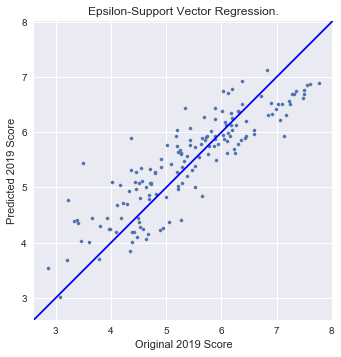

In [102]:
fig, ax = plt.subplots()
plt.scatter(y_test, score_predict2.flatten(),s = 10)
plt.xlabel('Original 2019 Score')
plt.ylabel('Predicted 2019 Score')
plt.title('Epsilon-Support Vector Regression.')
# Adding a blue line which indicates: Original 2019 Score = Predicted 2019 Score
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'b-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [103]:
RMSE = np.sqrt(mean_squared_error(score_original, score_predict2)) 
mean = np.mean(score_original)
print(RMSE)
print(mean)
# Evaluating the performance by score
# The RMSE of our predicted score is quite small, so we can say that the multiple linear regression model did well.

0.5591065502163332
5.407096153846153


In [104]:
rank_predict2 = pd.Series(score_predict2).rank(ascending = 0) # predicted rank for 2019
RMSE = np.sqrt(mean_squared_error(df_2019["Overall rank"], rank_predict2)) 
print(RMSE)
# Evaluating the performance by rank
# The RMSE of our predicted rank is small, so we can say that the multiple linear regression model did well.

21.908024522113774


# Model 3: Neural Network
The third model we used is Neural Network. Multi-Layer Perceptron is one example of feedforward neural networks. It has three layers: Input layer, Hidden layer, Output layer. Each layer has many neurons. Neurons are the most fundamental units of a neural network. A neuron takes in data, processes the information, and produces output. The idea behinds the algorithm is: feed the input, then use some math to minimize the loss in the neural network, finally we get the output at the end.

In [105]:
# Build the model
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(hidden_layer_sizes=500, max_iter=1000)
net = neural_net.fit(X_train, y_train)
score_predict3 = neural_net.predict(X_test) # predicted score for 2019
net.score(X_test, y_test)# The best possible value is 1, might be negative

0.7353499634363319

(2.603303824567446, 8.018696175432556)

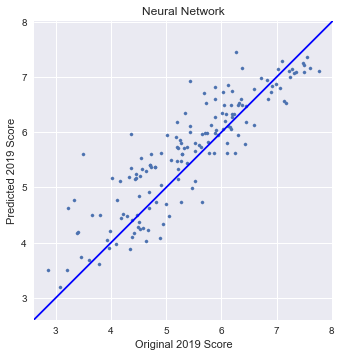

In [106]:
fig, ax = plt.subplots()
plt.scatter(y_test, score_predict3.flatten(),s = 10)
plt.xlabel('Original 2019 Score')
plt.ylabel('Predicted 2019 Score')
plt.title('Neural Network')
# Adding a blue line which indicates: Original 2019 Score = Predicted 2019 Score
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'b-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

In [107]:
RMSE = np.sqrt(mean_squared_error(score_original, score_predict3)) 
mean = np.mean(score_original)
print(RMSE)
print(mean)
# Evaluating the performance by score
# The RMSE of our predicted score is quite small, so we can say that the multiple linear regression model did well.

0.5707967135011314
5.407096153846153


In [108]:
rank_predict3 = pd.Series(score_predict3).rank(ascending = 0) # predicted rank for 2019
RMSE = np.sqrt(mean_squared_error(df_2019["Overall rank"], rank_predict3)) 
print(RMSE)
# Evaluating the performance by rank
# The RMSE of our predicted rank is small, so we can say that the multiple linear regression model did well.

20.73644135332772


# Fomula:

In [109]:
regression.intercept_
# Multiple linear regression intercept

2.29937623994713

In [110]:
regression.coef_
# Multiple linear regression coeffcients

array([1.14588287, 1.16559883, 0.5446503 , 1.85021572])

# Score =  2.29937623994713 + GDP per capita * 1.14588287 +Social support * 1.16559883 + Healthy life expectancy * 0.5446503 +Freedom to make life choices * 1.85021572